<a href="https://colab.research.google.com/github/changsin/CV/blob/main/01_07_pinhole_camera_perspective_projection_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image Formation: 3D to 2D

The following are exercises done for Hany Faird's [Computer Vision course](https://youtube.com/playlist?list=PLhwIOYE-ldwL6h-peJADfNm8bbO3GlKEy&si=sXmtTvaJDQb6QD20)

## 01-07 [Image Formation: pinhole camera: perspective projection, 3-D](https://youtu.be/TilwFc9bTQA?si=zI88yXegsP1_MxbU).

Write some code that simulates the projection of a d-D cube under perspective projection. The eight corners of the cube are:


$
[0,0,0],[1,0,0],[1,1,0],[0,1,0],[0,0,1],[1,0,1],[1,1,1],[0,1,1]
$

$
\begin{bmatrix}
0 & 0 & 0 \\
1 & 0 & 0 \\
1 & 1 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1 \\
1 & 0 & 1 \\
1 & 1 & 1 \\
0 & 1 & 1 \\
\end{bmatrix}
$

Specify the translation and rotation around the x-, y-, and z-axis and build the 3x4 extrinsic matrix M. Specify the focal length and camera center, and build the 3x3 intrinsic matirix K.
Project under perspective projection using the projection matrix formulation:

$
\begin{bmatrix}
x_s \\
y_x \\
S \\
\end{bmatrix} $ =
$
\lambda
\begin{bmatrix}
f & 0 & c_x \\
0 & f & c_y \\
0 & 0 & 1 \\
\end{bmatrix}
$
$
\begin{bmatrix}
r_{11} & r_{21} & r_{31} & t_X \\
r_{12} & r_{22} & r_{32} & t_Y \\
r_{13} & r_{23} & r_{33} & t_Z \\
\end{bmatrix}
$
$
\begin{bmatrix}
X_w \\
Y_w \\
Z_w \\
1 \\
\end{bmatrix}
$

$
\vec{p} = \lambda K M \vec{P}
$

$
R
$ =
$
\begin{bmatrix}
1 & 0 & 0 \\
0 & cos(\theta_x) & -sin(\theta_x) \\
0 & sin(\theta_x) & cos(\theta_x) \\
\end{bmatrix}
$
$
\begin{bmatrix}
cos(\theta_y) & 0 & sin(\theta_y) \\
0 & 1 & 0 \\
-sin(\theta_y) & 0 & cos(\theta_y) \\
\end{bmatrix}
$
$
\begin{bmatrix}
cos(\theta_z) & -sin(\theta_z) & 0 \\
sin(\theta_z) & cos(\theta_z) & 0 \\
0 & 0 & 1 \\
\end{bmatrix}
$

p (projection: homogeneous coordinates): [[  0.           0.8660254    1.1160254    0.25         0.4330127
    1.29903811   1.54903811   0.6830127 ]
 [  0.           0.           0.8660254    0.8660254   -0.5
   -0.5          0.3660254    0.3660254 ]
 [100.          99.5         99.9330127  100.4330127  100.75
  100.25       100.6830127  101.1830127 ]]
x: [0.         0.00870377 0.01116774 0.00248922 0.00429789 0.01295799
 0.0153853  0.00675027]
y: [ 0.          0.          0.00866606  0.00862292 -0.00496278 -0.00498753
  0.00363542  0.00361746]


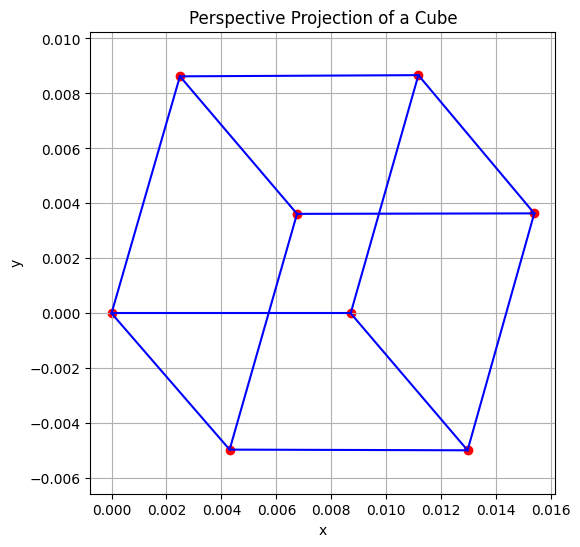

In [ ]:
import numpy as np
from math import sin, cos
import matplotlib.pyplot as plt

# 3-D, unit-cube (homogeneous coordinates)
P = np.array([[0,0,0,1], [1,0,0,1], [1,1,0,1], [0,1,0,1],
             [0,0,1,1], [1,0,1,1], [1,1,1,1], [0,1,1,1]])

# transformation matrix
Rx = np.radians(30) # rotation (radians)
Ry = np.radians(30)
Rz = np.radians(0)

Tx = 0 # translation
Ty = 0 #
Tz = 100 #
f = 1 # focal length

K   = np.array([[f, 0, 0], [0, f, 0], [0, 0, 1]]) # intrinsic matrix
RMx = np.array([[1,0,0], [0, cos(Rx), -sin(Rx)], [0, sin(Rx), cos(Rx)]])
RMy = np.array([[cos(Ry), 0, sin(Ry)], [0,1,0], [-sin(Ry), 0, cos(Ry)]])
RMz = np.array([[cos(Rz), -sin(Rz), 0], [sin(Rz), cos(Rz), 0], [0,0,1]])
RM  = RMz @ RMy @ RMx
M   = np.zeros((3,4))

M[0,3] = Tx
M[1,3] = Ty
M[2,3] = Tz
M[0:3,0:3] = RM # extrinsic matrix

# perspective projection
p = K @ M @ np.transpose(P) # projection (homogeneous coordinates)
x = p[0,:]/p[2,:] # convert to non-homogeneous coordinates
y = p[1,:]/p[2,:]

print(f"p (projection: homogeneous coordinates): {p}")
print(f"x: {x}")
print(f"y: {y}")


# Define edges of the cube for connecting points
edges = [
    (0, 1), (1, 2), (2, 3), (3, 0),  # bottom face
    (4, 5), (5, 6), (6, 7), (7, 4),  # top face
    (0, 4), (1, 5), (2, 6), (3, 7)   # vertical edges
]

# Plotting
plt.figure(figsize=(6, 6))
for edge in edges:
    plt.plot([x[edge[0]], x[edge[1]]], [y[edge[0]], y[edge[1]]], 'b-')  # connect vertices

plt.scatter(x, y, color='red')  # plot the vertices
plt.xlabel('x')
plt.ylabel('y')
plt.title('Perspective Projection of a Cube')
plt.axis('equal')
plt.grid(True)
plt.show()

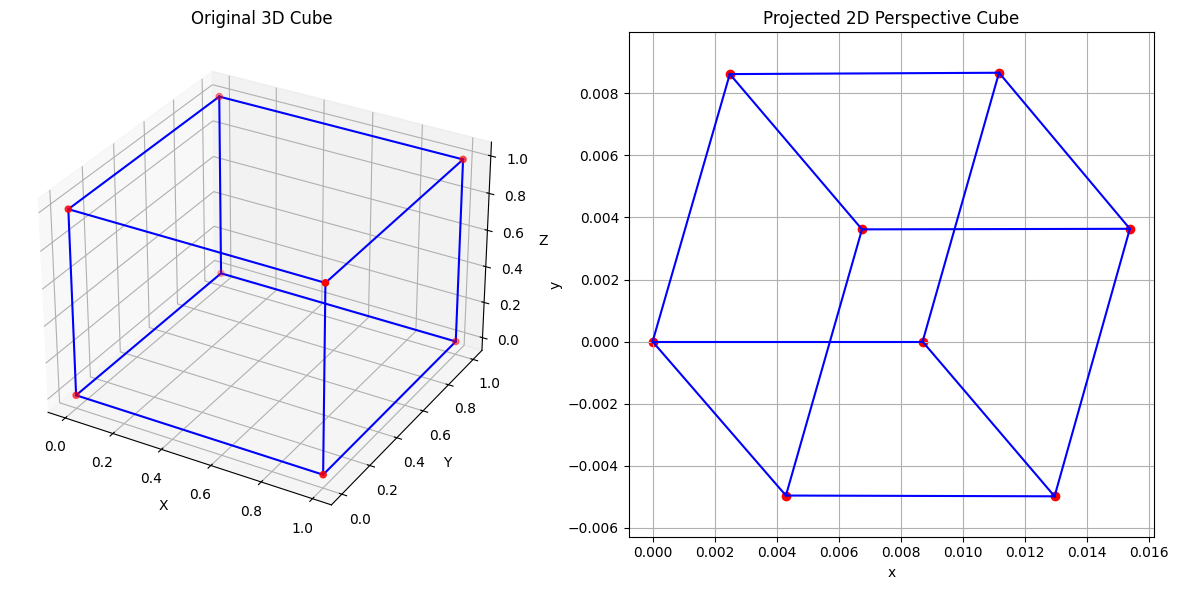

In [ ]:
# Import necessary libraries
import numpy as np
from math import sin, cos
import matplotlib.pyplot as plt

# Original cube in 3D (P) and its projected points (x, y) calculated previously

# Define edges of the cube for connecting points
edges = [
    (0, 1), (1, 2), (2, 3), (3, 0),  # bottom face
    (4, 5), (5, 6), (6, 7), (7, 4),  # top face
    (0, 4), (1, 5), (2, 6), (3, 7)   # vertical edges
]

# Original 3D cube points in P (x, y, z) for plotting
P_3D = P[:, :3].T  # Extract 3D points from the 4D homogeneous coordinates
original_x, original_y, original_z = P_3D[0], P_3D[1], P_3D[2]

# Plotting
fig = plt.figure(figsize=(12, 6))

# Plot the original 3D cube
ax1 = fig.add_subplot(121, projection='3d')
for edge in edges:
    ax1.plot(
        [original_x[edge[0]], original_x[edge[1]]],
        [original_y[edge[0]], original_y[edge[1]]],
        [original_z[edge[0]], original_z[edge[1]]],
        'b-'
    )
ax1.scatter(original_x, original_y, original_z, color='red')  # plot the vertices
ax1.set_title("Original 3D Cube")
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# Plot the projected 2D cube
ax2 = fig.add_subplot(122)
for edge in edges:
    ax2.plot([x[edge[0]], x[edge[1]]], [y[edge[0]], y[edge[1]]], 'b-')  # connect vertices
ax2.scatter(x, y, color='red')  # plot the vertices
ax2.set_title("Projected 2D Perspective Cube")
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.axis('equal')
ax2.grid(True)

plt.tight_layout()
plt.show()


## 1.6 Camera & Screen Coordinates
The projective transformation (homography) formula is a simplified pinhole model.
Technically, it needs one more step. A point in the world is first mapped to a point in the camera and then results in a point on the screen (image).
In other words, world coordinates should be translated into camera coordinates and then screen coordinates.
A camera has a focal length ($ f $) and the principal point (the center of the image or the offset from the optical axis).

$$
\begin{bmatrix}
x' \\
y' \\
1
\end{bmatrix}
=
\begin{bmatrix}
\cos \theta & -\sin \theta & t_x \\
\sin \theta & \cos \theta & t_y \\
0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
x \\
y \\
1
\end{bmatrix}
$$

World -> Camera
$$
\begin{bmatrix}
X_c \\
Z_c
\end{bmatrix}
=
\begin{bmatrix}
\cos \theta & -\sin \theta & t_x \\
\sin \theta & \cos \theta & t_y \\
\end{bmatrix}
\begin{bmatrix}
X_w \\
Z_w \\
1
\end{bmatrix}
$$

World -> Camera -> Screen
$$
\begin{bmatrix}
X_s \\
S
\end{bmatrix}
=
\begin{bmatrix}
f & 0 \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
\cos \theta & -\sin \theta & t_x \\
\sin \theta & \cos \theta & t_y
\end{bmatrix}
\begin{bmatrix}
X_w \\
Z_w \\
1
\end{bmatrix}
$$

World -> Camera -> Screen

- $ X_s $: unscaled x-coordinate on the screen
- $ S $: scaling factor for the projective projection
- $ f $: focal length
- $ c_x $ origin offset of the camera
$$
\begin{bmatrix}
X_s \\
S
\end{bmatrix}
=
\begin{bmatrix}
f & c_x \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
\cos \theta & -\sin \theta & t_x \\
\sin \theta & \cos \theta & t_y
\end{bmatrix}
\begin{bmatrix}
X_w \\
Z_w \\
1
\end{bmatrix}
$$

To get the final, correct screen coordinates $ (x_s, y_s) $, you must perform a perspective divide, using S as the denominator. The final screen coordinates are:

$$
x_s = \frac{S_X}{s}
$$

$$
y_s = \frac{S_Y}{s}
$$


$$
\begin{bmatrix}
X_s \\
Z_s
\end{bmatrix}
=
\begin{bmatrix}
f & c_x \\
0 & 1
\end{bmatrix}
\begin{bmatrix}
\cos \theta & -\sin \theta & t_x \\
\sin \theta & \cos \theta & t_y
\end{bmatrix}
\begin{bmatrix}
X_w \\
Z_w \\
1
\end{bmatrix}
$$


## 1.7.1 3D Transformation

$
\vec{p} = \lambda K M \vec{P}
$

- $ \lambda $: pixel density
- $ K $: intrinsic matrix
- $ M $: extrinsic matrix

$
\begin{bmatrix}
x_s \\
y_s \\
S \\
\end{bmatrix} $ =
$
\lambda
\begin{bmatrix}
f & 0 & c_x \\
0 & f & c_y \\
0 & 0 & 1 \\
\end{bmatrix}
$
$
\begin{bmatrix}
r_{11} & r_{21} & r_{31} & t_X \\
r_{12} & r_{22} & r_{32} & t_Y \\
r_{13} & r_{23} & r_{33} & t_Z \\
\end{bmatrix}
$
$
\begin{bmatrix}
X_w \\
Y_w \\
Z_w \\
1 \\
\end{bmatrix}
$
- $ x_s, y_s $: un-scaled pixel coordinates
- $ S $:  the scaling factor

The scaling factor $ S $ equals to the depth of the point in the camera's coordinate system.

### 1.7.2 The full rotation matrix
$$
R = R_X(\theta_x) \cdot R_Y(\theta_y) \cdot R_Z(\theta_z)
$$

- $ R_X $ (Pitch): Rotation around the x-axis.
- $ R_Y $ (Yaw): Rotation around the y-axis.
- $ R_Z $ (Roll): Rotation around the z-axis.


$$
R = \begin{bmatrix}
1 & 0 & 0 \\
0 & cos(\theta_x) & -sin(\theta_x) \\
0 & sin(\theta_x) & cos(\theta_x) \\
\end{bmatrix}
\begin{bmatrix}
cos(\theta_y) & 0 & sin(\theta_y) \\
0 & 1 & 0 \\
-sin(\theta_y) & 0 & cos(\theta_y) \\
\end{bmatrix}
\begin{bmatrix}
cos(\theta_z) & -sin(\theta_z) & 0 \\
sin(\theta_z) & cos(\theta_z) & 0 \\
0 & 0 & 1 \\
\end{bmatrix}
$$

# 1.8 The Thin Lens Model


- $ f $: focal length
- $ Z $: object distnace
- $ d $: image distance

$$
\frac{1}{f} = \frac{1}{Z} + \frac{1}{d}
$$

## f-number

$$
f/\# = \frac{f}{d}
$$

- $ f $: focal length
- $ d $: aperture diameter